# Esercitazione 10
7 Maggio 2024

In [2]:
import numpy as np
import scipy.linalg as spl
import numpy.linalg as npl
import SolveTriangular
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath('../Scheletri'))
import Schel_FULL as sf

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [[1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



rango= 2
Alpha EQN =  [[1.21492318]
 [1.90511021]]
Alpha QR =  [[1.21492318]
 [1.90511021]]
Alpha SVD =  [[1.21492318]
 [1.90511021]]
Residuo EQN  4.954617839084975
residuo QR  4.954617839084981
Residuo SVD  4.954617839084981


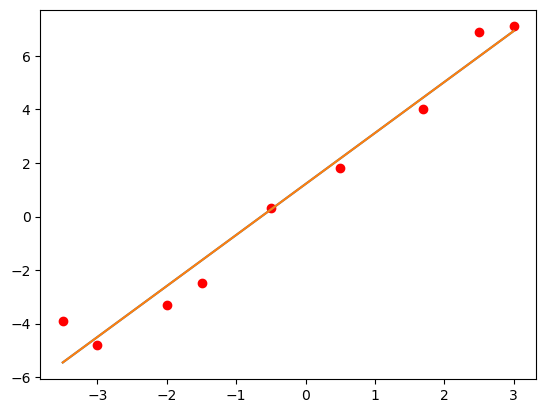

In [3]:
x = np.array([-3.5, -3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3])
y = np.array([-3.9, -4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])
#x = np.array([-3.14, -2.4, -1.57, -0.7, -0.3, 0, 0.4, 0.7, 1.57])
#y = np.array([0.02, -1, -0.9, -0.72, -0.2, -0.04, 0.65, 0.67, 1.1])
#x = np.array([1.001, 1.004, 1.005, 1.0012, 1.0013, 1.0014, 1.0015, 1.0016])
#y = np.array([-1.2, -0.95, -0.9, -1.15, -1.1, -1])

m = x.shape[0]
n = 1
grad_lib = n+1

V = np.vander(x, increasing=True)[:, :grad_lib]

#print(V)

#alpha è un vettore (1, grad_lib) che rappresenta i coefficienti del polinomio
alpha_EQN = sf.eqnorm(V,y)
res_EQN = npl.norm(V@alpha_EQN - y.reshape(m,1))**2

alpha_QR,res_QR=sf.qrLS(V,y)
alpha_SVD,res_SVD=sf.SVDLS(V,y)

print("Alpha EQN = ", alpha_EQN)
print("Alpha QR = ", alpha_QR)
print("Alpha SVD = ", alpha_SVD)


print("Residuo EQN ",res_EQN)
print("residuo QR ",res_QR)
print("Residuo SVD ",res_SVD)

xx = np.linspace(np.min(x), np.max(x), 100)
pol_EQN=np.polyval(np.flip(alpha_EQN),xx)
pol_QR=np.polyval(np.flip(alpha_QR),xx)
pol_SVD=np.polyval(np.flip(alpha_SVD),xx)
plt.plot(x,y,'ro',xx,pol_QR,xx,pol_SVD)
plt.show()




## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



## Esercizio 3:
Scrivere uno script Python per approssimare la seguente configurazione di punti

$$
\begin{array}{l}
x = [10 \, : \, 0.5/5 \, : \, 10.5] ;\\
y = [11.0320, \, 11.1263, \, 11.1339, \, 11.1339, \, 11.1993, \, 11.1844] ;
\end{array}
$$

mediante un polinomio ai minimi quadrati di grado 4 costruito  con il metodo
delle equazioni normali, con il metodo QRLS e con il metodo SVDLS.
Perturbare poi il secondo punto nel seguente modo
$$x(1) = x(1) + 0.013; \quad y(1) = y(1) - 0.001;$$
e calcolare i polinomi ai minimi quadrati relativi alla
configurazione perturbata. Commentare e motivare i risultati ottenuti.



rango= 5
Alpha EQN =  [[-7.44297202e+04]
 [ 2.88066381e+04]
 [-4.18014567e+03]
 [ 2.69582412e+02]
 [-6.51934679e+00]]
Alpha QR =  [[-5.19170859e+05]
 [ 2.02416567e+05]
 [-2.95914119e+04]
 [ 1.92249073e+03]
 [-4.68333332e+01]]
Alpha SVD =  [[-5.19170894e+05]
 [ 2.02416581e+05]
 [-2.95914139e+04]
 [ 1.92249087e+03]
 [-4.68333364e+01]]
Residuo EQN  0.0015167608359053083
residuo QR  0.0001793601604944298
Residuo SVD  0.00017936005855011229


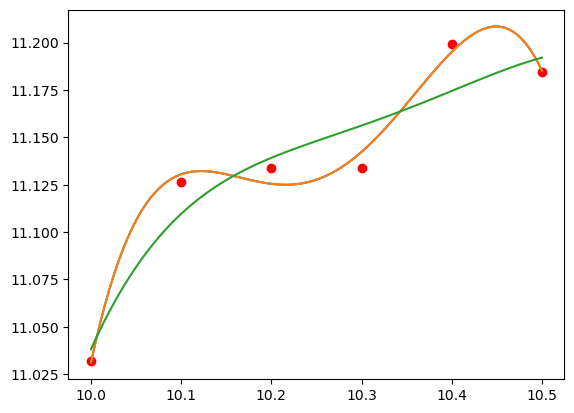

In [4]:
x = np.arange(10, 10.6, 0.1) 
y = np.array([11.0320, 11.1263, 11.1339, 11.1339, 11.1993, 11.1844])

m = x.shape[0]
n = 4
grad_lib = n+1

V = np.vander(x, increasing=True)[:, :grad_lib]

#print(V)

#alpha è un vettore (1, grad_lib) che rappresenta i coefficienti del polinomio
alpha_EQN = sf.eqnorm(V,y)
res_EQN = npl.norm(V@alpha_EQN - y.reshape(m,1))**2

alpha_QR,res_QR=sf.qrLS(V,y)
alpha_SVD,res_SVD=sf.SVDLS(V,y)

print("Alpha EQN = ", alpha_EQN)
print("Alpha QR = ", alpha_QR)
print("Alpha SVD = ", alpha_SVD)


print("Residuo EQN ",res_EQN)
print("residuo QR ",res_QR)
print("Residuo SVD ",res_SVD)

xx = np.linspace(np.min(x), np.max(x), 100)
pol_EQN=np.polyval(np.flip(alpha_EQN),xx)
pol_QR=np.polyval(np.flip(alpha_QR),xx)
pol_SVD=np.polyval(np.flip(alpha_SVD),xx)
plt.plot(x,y,'ro',xx,pol_QR,xx,pol_SVD, xx, pol_EQN)
plt.show()



rango= 5
Alpha QR =  [[-5.08052814e+05]
 [ 1.98094744e+05]
 [-2.89614879e+04]
 [ 1.88168902e+03]
 [-4.58423824e+01]]
Alpha SVD =  [[-5.08052717e+05]
 [ 1.98094706e+05]
 [-2.89614824e+04]
 [ 1.88168866e+03]
 [-4.58423736e+01]]
Residuo EQN  0.00134381861375731
residuo QR  0.00020144369415317243
Residuo SVD  0.00020144362519375862


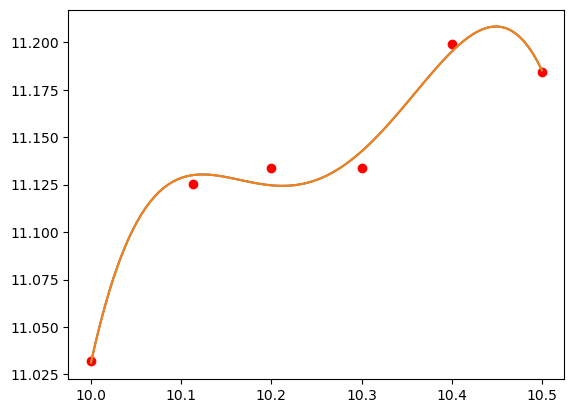

In [5]:
xpert = x.copy()
ypert = y.copy()

xpert[1] += 0.013
ypert[1] -= 0.001

m = xpert.shape[0]
n = 4
grad_lib = n+1

V = np.vander(xpert, increasing=True)[:, :grad_lib]

#print(V)

#alpha è un vettore (1, grad_lib) che rappresenta i coefficienti del polinomio
#alpha_EQN = sf.eqnorm(V,ypert)
res_EQN = npl.norm(V@alpha_EQN - ypert.reshape(m,1))**2

alpha_QR,res_QR=sf.qrLS(V,ypert)
alpha_SVD,res_SVD=sf.SVDLS(V,ypert)

#print("Alpha EQN = ", alpha_EQN)
print("Alpha QR = ", alpha_QR)
print("Alpha SVD = ", alpha_SVD)


print("Residuo EQN ",res_EQN)
print("residuo QR ",res_QR)
print("Residuo SVD ",res_SVD)

xx = np.linspace(np.min(xpert), np.max(xpert), 100)
#pol_EQN=np.polyval(np.flip(alpha_EQN),xx)
pol_QR=np.polyval(np.flip(alpha_QR),xx)
pol_SVD=np.polyval(np.flip(alpha_SVD),xx)
plt.plot(xpert,ypert,'ro',xx,pol_QR,xx,pol_SVD)
plt.show()




## Esercizio 1

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.

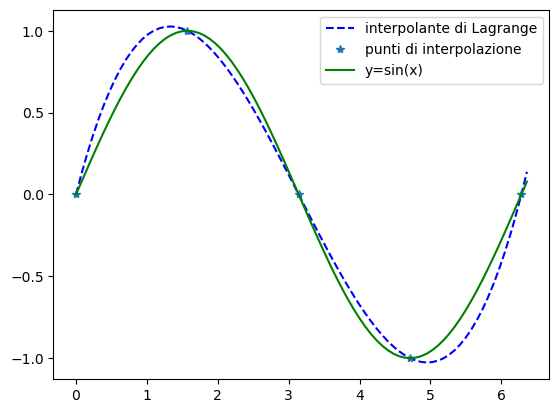

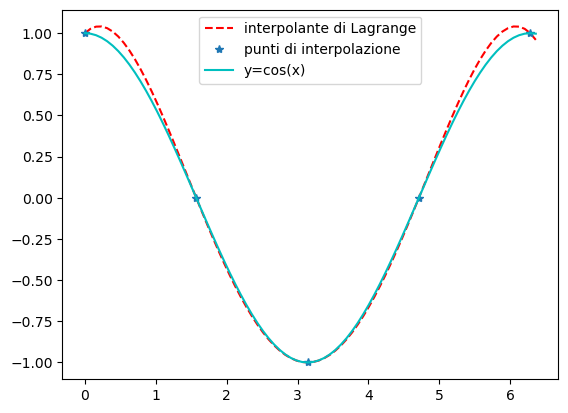

In [6]:
x=np.arange(0, 2*np.pi+0.1, np.pi/2)
y1=np.sin(x)
xx=np.arange(0,2*np.pi+0.1,np.pi/40)
yy1=sf.InterpL(x,y1,xx)


plt.plot(xx,yy1,'b--',x,y1,'*',xx,np.sin(xx),'g-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=sin(x)']);
plt.show()

y2=np.cos(x)
yy2=sf.InterpL(x,y2,xx);
plt.plot(xx,yy2,'r--',x,y2,'*',xx,np.cos(xx),'c-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=cos(x)']);

## Esercizio 2
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

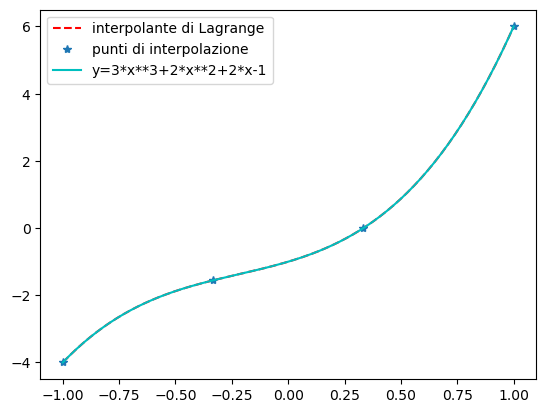

In [7]:
x=np.linspace(-1,1,4)
f= lambda x: 3*x**3+2*x**2+2*x-1
y=f(x)
xx=np.linspace(-1,1,200)
polL=sf.InterpL(x,y ,xx)
plt.plot(xx,polL,'r--',x,y,'*',xx,f(xx),'c-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=3*x**3+2*x**2+2*x-1']);
#Poichè i nodi  (xi.yi) sono ottenuti valutando una funzione che è un polinomio di grado 3
# (che ha quindi derivata quarta nulle) nei punti xi,i=0,3, è nullo l'errore che si commette quando
#alla funzione che ha generato i dati si sostituisce il polinomio interpolatore di grado 3
#Vedi formula dell'errore dell'interpolazione polinomiale nelle dispense teoriche

## Esercizio 3
La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ 
L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])
T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.


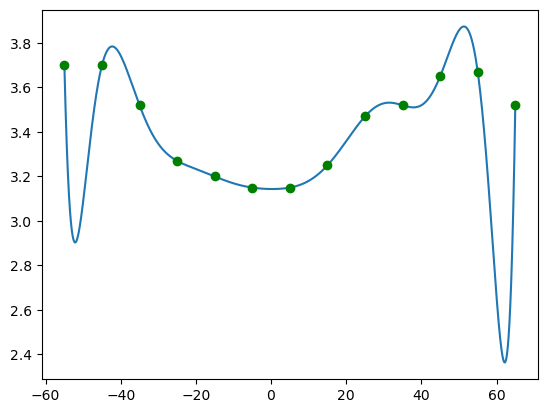

In [8]:
L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])
T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])

min = np.min(L)
max = np.max(L)

xx = np.linspace(min,max, (max-min)*100)

yy = sf.InterpL(L, T, xx)

plt.plot(xx, yy)
plt.plot(L,T, 'go')
plt.show()


## Esercizio 4

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).


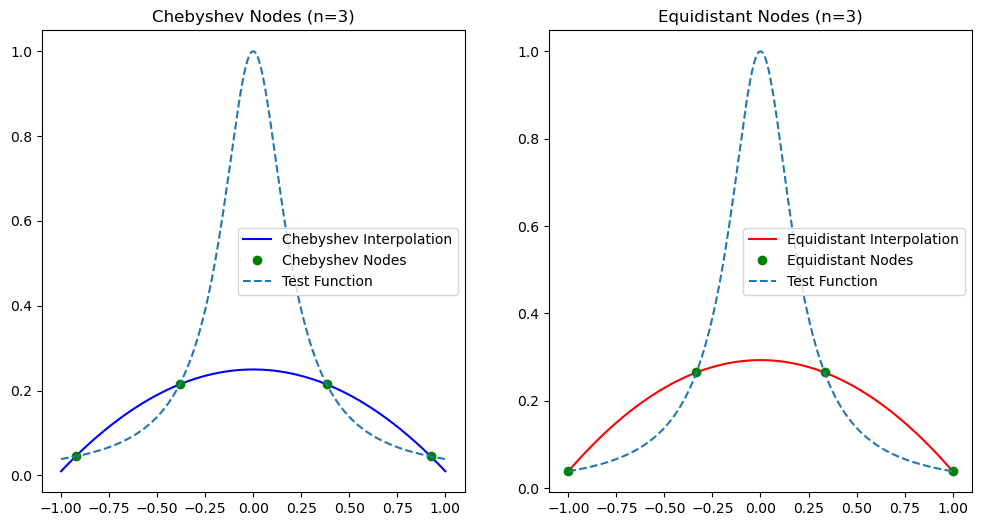

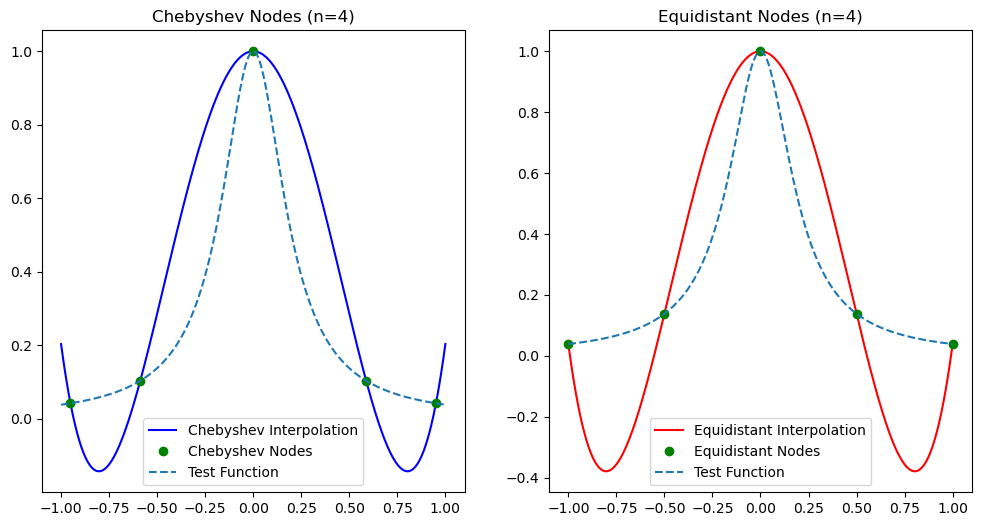

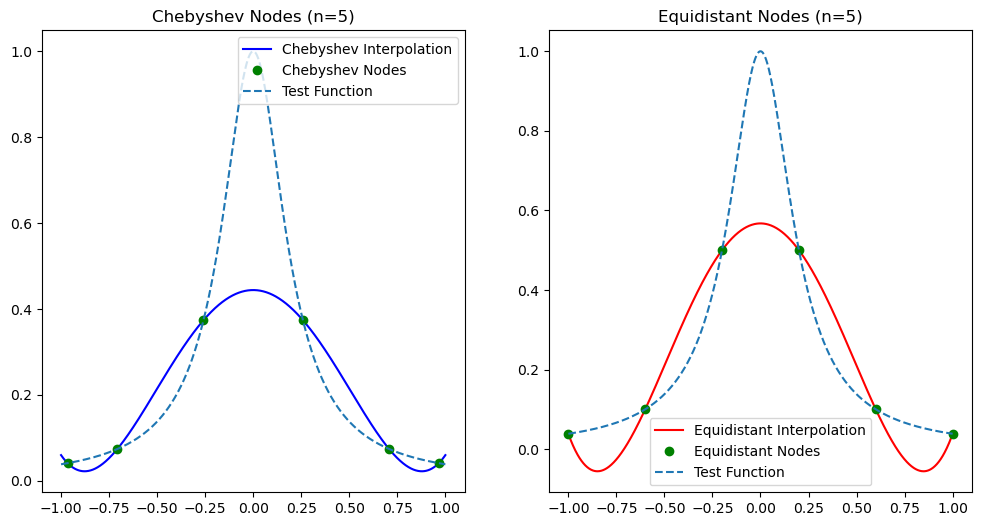

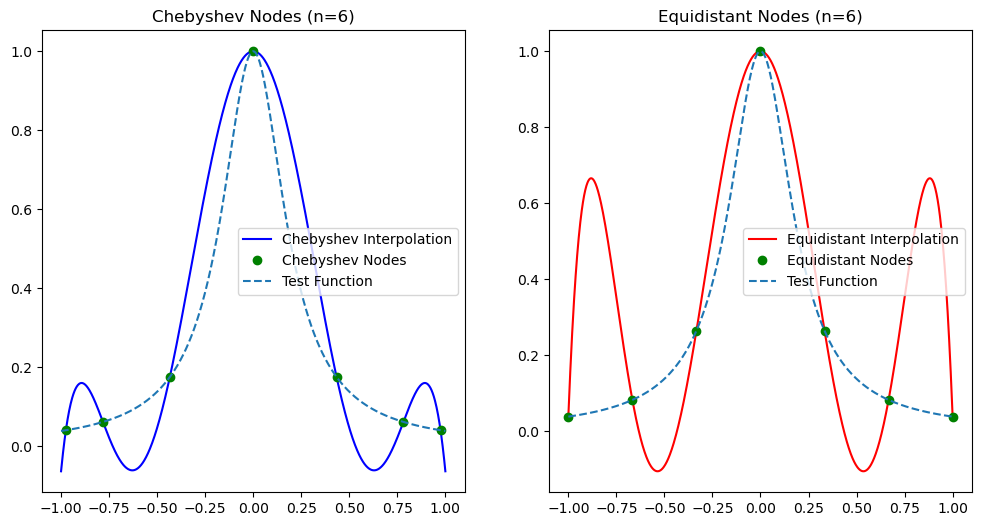

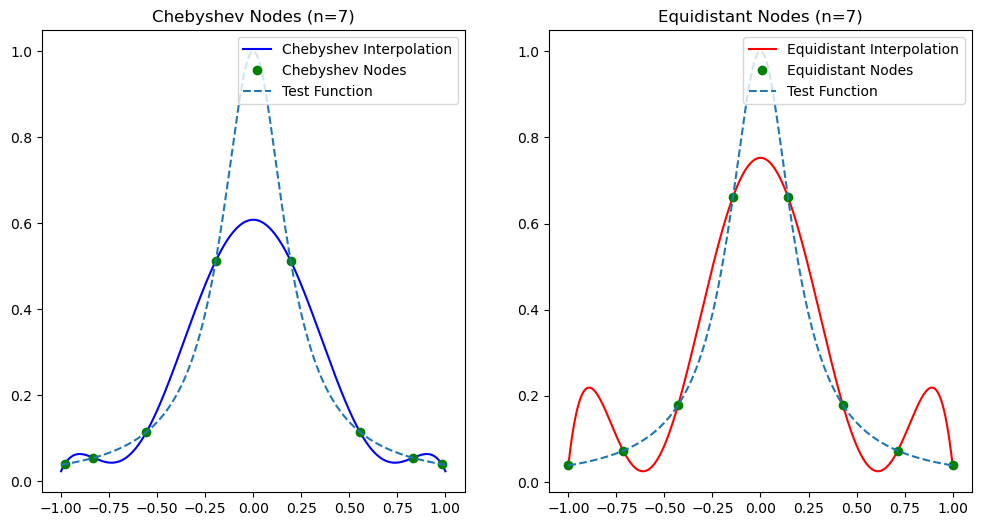

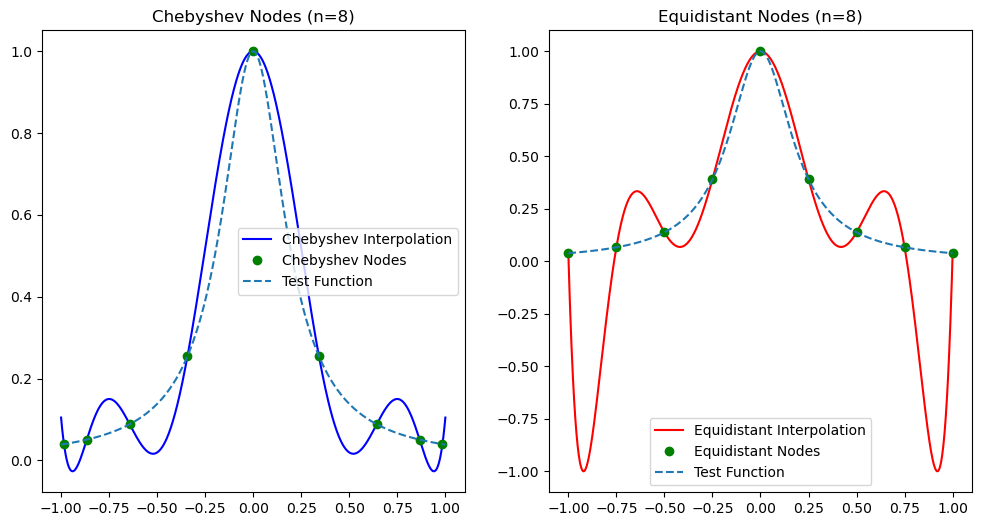

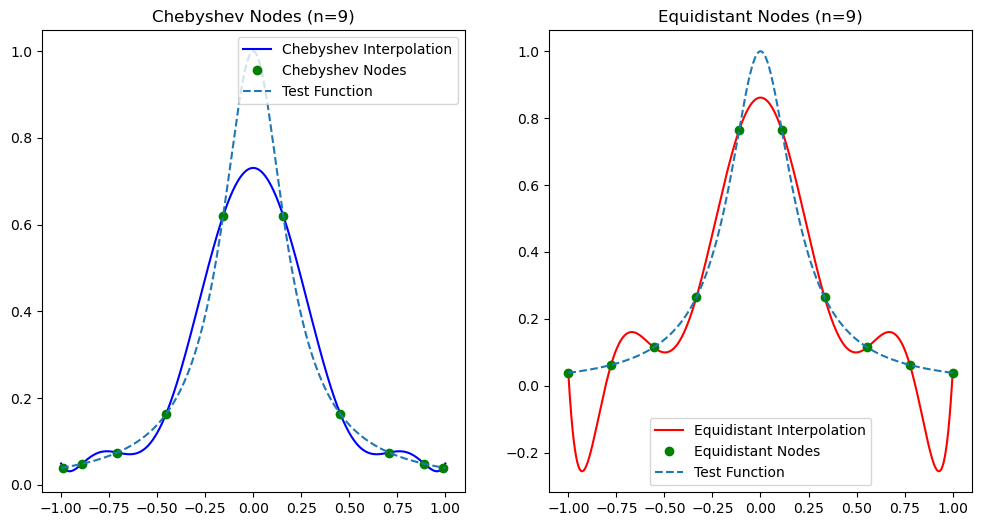

In [9]:
import math

def chebishev(a, b, n):
    nodes = []
    for i in range (0, n+1):
        x = (a+b)/2 + ((b-a)/2)*np.cos(((2*i +1)*np.pi)/(2*(n+1)))
        nodes.append(x)
    nodes.sort()
    return nodes

def chebishev2(a,b,n):
    t1=(a+b)/2
    t2=(b-a)/2
    diff=[]
    x=np.zeros((n+1,))
     
    for k in range(n+1):
        x[k]=t1+t2*np.cos(((2*k+1)/(2*(n+1))*np.pi))
    return x

def equidistanti(a,b,n):
    return np.linspace(a,b,n+1)




n_values = range(3, 10, 1)

for n in n_values:

    #f = lambda x: np.sin(x) - 2* np.sin(2*x)
    #a, b = (- np.pi, np.pi)
    #f = lambda x: np.sinh(x)
    #a, b = (-2, 2)
    #f = lambda x: np.abs(x)
    #a, b = (-1, 1)
    f = lambda x: 1/(1 + 25 * x**2)
    a, b = (-1, 1)

    nodi_cheb = np.array(chebishev(a,b,n))
    nodi_equi = np.array(equidistanti(a,b,n))

    xx = np.linspace(a, b, 1000)
    

    yy_cheb = sf.InterpL(nodi_cheb, f(nodi_cheb), xx)
    yy_equi = sf.InterpL(nodi_equi, f(nodi_equi), xx)

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot Chebyshev interpolation on the left subplot
    ax1.plot(xx, yy_cheb, 'b-', label='Chebyshev Interpolation')
    ax1.plot(nodi_cheb, f(nodi_cheb), 'go', label='Chebyshev Nodes')
    ax1.plot(xx, f(xx),'--', label='Test Function')
    ax1.set_title(f'Chebyshev Nodes (n={n})')
    ax1.legend()

    # Plot Equidistant interpolation on the right subplot
    ax2.plot(xx, yy_equi, 'r-', label='Equidistant Interpolation')
    ax2.plot(nodi_equi, f(nodi_equi), 'go', label='Equidistant Nodes')
    ax2.plot(xx, f(xx),'--', label='Test Function')
    ax2.set_title(f'Equidistant Nodes (n={n})')
    ax2.legend()

    # Show the figure with both subplots
    plt.show()




## Esercizio 5

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

Lebesgue constants for equidistant nodes varying n:
 [3.10493825e+00 2.98943063e+01 5.08711306e+02 1.07596490e+04]
Lebesgue constants for Chebyshev nodes varying n:
 [2.10439768 2.48943038 2.72777794 2.90082503]


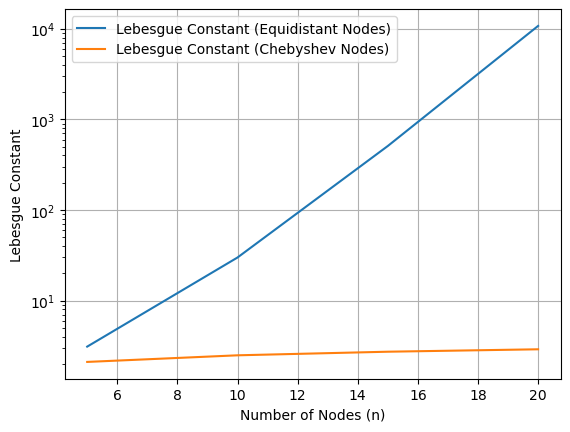

In [10]:
import numpy as np
import matplotlib.pyplot as plt



# Define the range of n values
n_values = np.arange(5, 21, 5)
# Initialize arrays to store Lebesgue constants for equidistant and Chebyshev nodes
lebesgue_constants_equidistant = np.zeros(len(n_values))
lebesgue_constants_chebyshev = np.zeros(len(n_values))

# Define the x-values for evaluation
xx = np.linspace(-1, 1, 200)

for i, n in enumerate(n_values):
    # Generate equidistant and Chebyshev nodes
    equidistant_nodes = np.linspace(-1, 1, n + 1)
    chebyshev_nodes = np.array(chebishev(-1, 1, n))
    
    # Initialize arrays to accumulate values for Lebesgue constants
    lebesgue_equidistant = np.zeros(200)
    lebesgue_chebyshev = np.zeros(200)
    
    for l in range(n + 1):
        # Compute the Lagrange polynomial for equidistant nodes
        lagrange_poly_equidistant = sf.plagr(equidistant_nodes, l)
        lebesgue_equidistant += np.abs(np.polyval(lagrange_poly_equidistant, xx))
        
        # Compute the Lagrange polynomial for Chebyshev nodes
        lagrange_poly_chebyshev = sf.plagr(chebyshev_nodes, l)
        lebesgue_chebyshev += np.abs(np.polyval(lagrange_poly_chebyshev, xx))
    
    # Calculate the maximum Lebesgue constant
    lebesgue_constants_equidistant[i] = np.max(lebesgue_equidistant)
    lebesgue_constants_chebyshev[i] = np.max(lebesgue_chebyshev)

# Print results
print('Lebesgue constants for equidistant nodes varying n:\n', lebesgue_constants_equidistant)
print('Lebesgue constants for Chebyshev nodes varying n:\n', lebesgue_constants_chebyshev)

# Plot results
plt.semilogy(n_values, lebesgue_constants_equidistant, label='Lebesgue Constant (Equidistant Nodes)')
plt.semilogy(n_values, lebesgue_constants_chebyshev, label='Lebesgue Constant (Chebyshev Nodes)')
plt.xlabel('Number of Nodes (n)')
plt.ylabel('Lebesgue Constant')
plt.legend()
plt.grid(True)
plt.show()


## Esercizio 6

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.


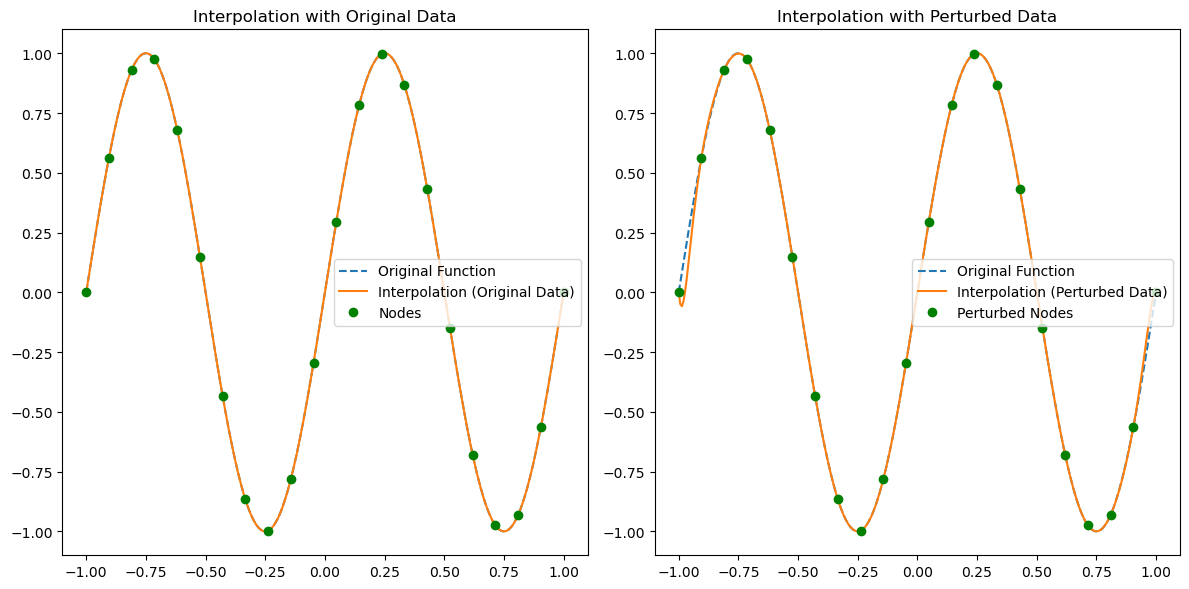

Relative Error for Original Data Interpolation: 0.000002
Relative Error for Perturbed Data Interpolation: 0.163837


In [17]:
import numpy as np
import matplotlib.pyplot as plt


# Define the function and parameters
f = lambda x: np.sin(2 * np.pi * x)
n = 22
a, b = (-1, 1)

# Generate nodes and function values
nodi = np.linspace(a, b, n)
f_nodi = f(nodi)

# Generate random perturbations and apply them to function values
rand = 0.0002 * np.random.random(n)
f_nodi_pert = f_nodi + rand  # Apply perturbations

# Define x values for plotting
xx = np.linspace(a, b, 300)

# Interpolate the original and perturbed data
y = sf.InterpL(nodi, f_nodi, xx)
ypert = sf.InterpL(nodi, f_nodi_pert, xx)

# Plot the original function and interpolation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(xx, f(xx), '--', label='Original Function')
plt.plot(xx, y, label='Interpolation (Original Data)')
plt.plot(nodi, f_nodi, 'go', label='Nodes')
plt.title('Interpolation with Original Data')
plt.legend()

# Plot the perturbed function and interpolation
plt.subplot(1, 2, 2)
plt.plot(xx, f(xx), '--', label='Original Function')
plt.plot(xx, ypert, label='Interpolation (Perturbed Data)')
plt.plot(nodi, f_nodi_pert, 'go', label='Perturbed Nodes')
plt.title('Interpolation with Perturbed Data')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate the relative error
error_original = npl.norm(y - f(xx), np.inf) / npl.norm(f(xx), np.inf)
error_perturbed = npl.norm(ypert - f(xx), np.inf) / npl.norm(f(xx), np.inf)

print(f'Relative Error for Original Data Interpolation: {error_original:.6f}')
print(f'Relative Error for Perturbed Data Interpolation: {error_perturbed:.6f}')
